# Data Analysis using Seaborn

DAX-30 companies apply too high cost of capital & thus miss out on potential economic value creation. The low interest rate environment created by the ECB is clearly not having a positive effect on investment behavior.

Analyses:
- Yield curve 10-year government bond
- Course of the WACC
-Identification of a possible gap between published and theoretically correct WACC

This notebook draws on empirically collected data from the financial statements of all DAX-30 companies.


## 1) Data Cleaning & Preparation

In [56]:
# Import package pandas
import pandas as pd

# import dataset as csv
wacc = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Portfolio_Projects/03_PhD_Analysen/03_WACC_EDA/WACC_der DAX-30_filled_missings_20220221_final.csv",
                   error_bad_lines = False,
                 sep = ";",
                 decimal = ",")

# View first rows of the dataset
wacc.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Unternehmen,Sektor,Industrie,Jahr,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_GB_nSt,WACC_GB_vSt,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,risikoloser Zins,Bilanzsumme_BW,Eigenkapital_BW,Fremdkapital_BW,EK-Quote_BW,FK-Quote_BW,Gesamtkapital_MKT,Marktkapitalisierung,FK-Kosten_bereinigt,EK-Quote_MKT,FK-Quote_MKT,FK-Kosten_unbereinigt,Zinsaufwand,FK_zinstragend,Steuersaetze,Marktrendite_Mittelwert,Marktrendite_1Y,Marktrendite_10Y,Investitionsquote,Umsatzerloese
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004.0,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005.0,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006.0,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007.0,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008.0,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


### Rename columns

In [57]:
# Rename columns ###############################################################
wacc = wacc.rename(columns = {"Unternehmen": "Company",
                            "Sektor": "Sector",
                            "Industrie": "Industry",
                            "Jahr": "Year",
                            " WACC_GB_nSt ": "WACC_FS_aT",
                            " WACC_GB_vSt ": "WACC_FS_bT",
                            "Eigenkapitalquote_MKT": "Equity_ratio_market",
                            " Fremdkapitalquote_MKT ": "Debt_ratio_market",
                            "risikoloser Zins": "Risk_free_interest",
                            "Bilanzsumme_BW": "Balance_sum",
                            "Eigenkapital_BW": "Equity_book",
                            "Fremdkapital_BW": "Debt_book",
                            "EK-Quote_BW": "Equity_ratio_book",
                            "FK-Quote_BW": "Debt_ratio_book",
                            "Gesamtkapital_MKT": "Total_assets_market",
                            "Marktkapitalisierung": "Market_cap",
                            "FK-Kosten_bereinigt": "Debt_costs_interestbearing",
                            "EK-Quote_MKT": "Equity_ratio_market",
                            "FK-Quote_MKT": "Debt_ratio_market",
                            "Aktienanzahl": "Shares_outstanding",
                            "Aktienkurs": "Share_price",
                            "FK-Kosten_unbereinigt": "Debt_costs_total",
                            "Zinsaufwand": "Interest_expense",
                            "FK_zinstragend": "Debt_interestbearing",
                            "Steuersaetze": "Tax_rate",
                            "Marktrendite_Mittelwert": "Market_return_average",
                            "Marktrendite_1Y": "Market_return_annual",
                            "Marktrendite_10Y": "Market_return_10year_rolling",
                            "Investitionsquote": "Investment_ratio",
                            "Umsatzerloese": "Revenue"
                            })

# Inspect column names
wacc.columns

Index(['Company', 'Sector', 'Industry', 'Year', 'WACC_cMR', 'WACC_15yMR',
       'WACC_10yMR', 'WACC_FS_aT', 'WACC_FS_bT', 'CAPM_cMR', 'CAPM_15yMR',
       'CAPM_10yMR', 'Beta', 'Risk_free_interest', 'Balance_sum',
       'Equity_book', 'Debt_book', 'Equity_ratio_book', 'Debt_ratio_book',
       'Total_assets_market', 'Market_cap', 'Debt_costs_interestbearing',
       'Equity_ratio_market', 'Debt_ratio_market', 'Debt_costs_total',
       'Interest_expense', 'Debt_interestbearing', 'Tax_rate',
       'Market_return_average', 'Market_return_annual',
       'Market_return_10year_rolling', 'Investment_ratio', 'Revenue'],
      dtype='object')

### Dealing with missing values

In [58]:
wacc.isna().sum()

Company                          1
Sector                           1
Industry                         1
Year                             1
WACC_cMR                         1
WACC_15yMR                       1
WACC_10yMR                       1
WACC_FS_aT                       1
WACC_FS_bT                       2
CAPM_cMR                         1
CAPM_15yMR                       1
CAPM_10yMR                       1
Beta                             1
Risk_free_interest               1
Balance_sum                      1
Equity_book                      1
Debt_book                        1
Equity_ratio_book                1
Debt_ratio_book                  1
Total_assets_market              1
Market_cap                       1
Debt_costs_interestbearing       1
Equity_ratio_market              1
Debt_ratio_market                1
Debt_costs_total                 1
Interest_expense                 1
Debt_interestbearing             1
Tax_rate                         1
Market_return_averag

In [59]:
# Lets see which row is of NaN-values -> probably the first or last one.
wacc.tail()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
506,MTU Aero Engines,Industrials,Aerospace and Defense,2019.0,0.0612,0.0414,0.0501,0.088,0.1078,0.0828,0.055144,0.06729,0.81,0.0046,7765.0,2421.0,5344.0,0.311784,0.688216,18536.0,13192.0,0.010394,0.711696,0.288304,0.004491,24.0,2309.0,0.267,0.08,0.255,0.083,NaN,NaN
507,MTU Aero Engines,Industrials,Aerospace and Defense,2020.0,0.0605,0.0389,0.0430,0.084,0.1038,0.0868,0.054774,0.06079,0.86,-0.0019,8104.0,2635.0,5469.0,0.325148,0.674852,16776.0,11307.0,0.008053,0.673999,0.326001,0.004023,22.0,2732.0,0.244,0.08,0.035,0.071,NaN,NaN
508,DeliveryHero,Consumer Cyclical,Internet Retail,2020.0,0.0820,0.0524,0.0579,0.128,0.1478,0.0940,0.059400,0.06590,0.93,-0.0019,5774.0,1169.0,4605.0,0.797541,0.797541,29926.0,25321.0,0.020374,0.846120,0.153880,0.013051,60.1,2950.0,0.302,0.08,0.035,0.071,NaN,NaN
509,DeutscheWohnen,Real Estate,Real Estate-Development,2020.0,0.0280,0.0196,0.0213,0.030,0.0498,0.0466,0.029100,0.03240,0.47,-0.0019,30797.0,13833.0,16964.0,0.550833,0.550833,33612.0,16648.0,0.014888,0.495299,0.504701,0.010121,171.7,11533.0,0.302,0.08,0.035,0.071,NaN,NaN
510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
# Subset wacc df by removing the last row
wacc = wacc[:-1]

# Check if amendment was implemented
wacc.tail()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
505,Wirecard AG,Technology,Software,2019.0,0.0623,0.0420,0.0509,0.082,0.1018,0.0742,0.049500,0.06033,0.72,0.0046,5855.0,1923.0,3932.0,0.328437,0.671563,22226.0,18292.0,0.009956,0.823000,0.177000,0.004349,17.1,1718.0,0.300,0.08,0.255,0.083,NaN,NaN
506,MTU Aero Engines,Industrials,Aerospace and Defense,2019.0,0.0612,0.0414,0.0501,0.088,0.1078,0.0828,0.055144,0.06729,0.81,0.0046,7765.0,2421.0,5344.0,0.311784,0.688216,18536.0,13192.0,0.010394,0.711696,0.288304,0.004491,24.0,2309.0,0.267,0.08,0.255,0.083,NaN,NaN
507,MTU Aero Engines,Industrials,Aerospace and Defense,2020.0,0.0605,0.0389,0.0430,0.084,0.1038,0.0868,0.054774,0.06079,0.86,-0.0019,8104.0,2635.0,5469.0,0.325148,0.674852,16776.0,11307.0,0.008053,0.673999,0.326001,0.004023,22.0,2732.0,0.244,0.08,0.035,0.071,NaN,NaN
508,DeliveryHero,Consumer Cyclical,Internet Retail,2020.0,0.0820,0.0524,0.0579,0.128,0.1478,0.0940,0.059400,0.06590,0.93,-0.0019,5774.0,1169.0,4605.0,0.797541,0.797541,29926.0,25321.0,0.020374,0.846120,0.153880,0.013051,60.1,2950.0,0.302,0.08,0.035,0.071,NaN,NaN
509,DeutscheWohnen,Real Estate,Real Estate-Development,2020.0,0.0280,0.0196,0.0213,0.030,0.0498,0.0466,0.029100,0.03240,0.47,-0.0019,30797.0,13833.0,16964.0,0.550833,0.550833,33612.0,16648.0,0.014888,0.495299,0.504701,0.010121,171.7,11533.0,0.302,0.08,0.035,0.071,NaN,NaN


At this point of the analysis, we do not consider handling the missing values of "Investment_ratio" and "Revenue". We might do some changes later, if necessary.

### Dealing with feature types

**Find datatype of each column**

In [61]:
# Check feature type of each column
wacc.dtypes

Company                          object
Sector                           object
Industry                         object
Year                            float64
WACC_cMR                        float64
WACC_15yMR                      float64
WACC_10yMR                      float64
WACC_FS_aT                      float64
WACC_FS_bT                      float64
CAPM_cMR                        float64
CAPM_15yMR                      float64
CAPM_10yMR                      float64
Beta                            float64
Risk_free_interest              float64
Balance_sum                     float64
Equity_book                     float64
Debt_book                       float64
Equity_ratio_book               float64
Debt_ratio_book                 float64
Total_assets_market             float64
Market_cap                      float64
Debt_costs_interestbearing      float64
Equity_ratio_market             float64
Debt_ratio_market               float64
Debt_costs_total                float64


In [62]:
# Select column that must be categorical
columns = ["Company", "Sector", "Industry"]

# Transform object columns
for col in columns:
  wacc[col] = wacc[col].astype("category")

# Check column types
wacc.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Company                         category
Sector                          category
Industry                        category
Year                             float64
WACC_cMR                         float64
WACC_15yMR                       float64
WACC_10yMR                       float64
WACC_FS_aT                       float64
WACC_FS_bT                       float64
CAPM_cMR                         float64
CAPM_15yMR                       float64
CAPM_10yMR                       float64
Beta                             float64
Risk_free_interest               float64
Balance_sum                      float64
Equity_book                      float64
Debt_book                        float64
Equity_ratio_book                float64
Debt_ratio_book                  float64
Total_assets_market              float64
Market_cap                       float64
Debt_costs_interestbearing       float64
Equity_ratio_market              float64
Debt_ratio_market                float64
Debt_costs_total

We see that the "Year"-column is of type float. To properly plot data in the context of time / years, we must also transform the "Year"-column to integer.

In [63]:
# Transform to integer value
wacc["Year"] = wacc["Year"].astype(int)
# Check transformation
wacc["Year"].dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


dtype('int64')

**Plot Histogram**

### Dealing with outliers

An outlier is that data that that differs significantly from other observations. A dataset might contain real outliers or outliers obtained after poor data collection or caused by data entry errors.
--> Using Histograms

From a **statistical perspective**, outliers are defined as points out of **`1.5 x IQR`** (Interquartile Range) or points that deviate more than **`3 x std`** of a distribution.
______________________________________________________________________________

Once we identified the outliers, we can easily filter them out by using Python’s operators.

Python operators are simple to memorize. **`&`** is the equivalent of **`and`**, while**`|`**is the equivalent of **`or`**.

In this case, we’re going to filter out outliers based on the values revealed by the boxplot.

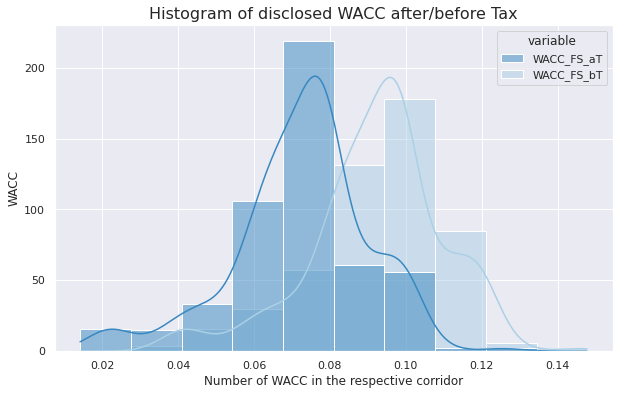

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define figure layout
plt.figure(figsize = (10,6))
sns.set_style("darkgrid")
sns.set_palette("Blues_r", n_colors = 2)

# Prepare data
df_hist = wacc[["WACC_FS_aT", "WACC_FS_bT"]]
df_hist = wacc.melt(value_vars = ["WACC_FS_aT", "WACC_FS_bT"], value_name = "WACC")

# Plot Histogram including KDE
sns.histplot(x = "WACC", data = df_hist, bins = 10, hue = "variable", legend=True, kde = True)

# Add annotations
plt.title("Histogram of disclosed WACC after/before Tax", size = 16)
plt.xlabel("Number of WACC in the respective corridor", size = 12)
plt.ylabel("WACC", size = 12);

## 2) Seaborn Visualization

There are plenty of resources that show potential use cases for seaborn plots:
- https://github.com/clair513/Seaborn-Tutorial
- https://github.com/kimfetti/Videos/tree/master/Seaborn
- https://www.youtube.com/watch?v=crQkHHhY7aY&list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j&index=13
- https://towardsdatascience.com/hierarchical-clustering-in-python-using-dendrogram-and-cophenetic-correlation-8d41a08f7eab

This posts serve as inspirations for the following visualizations with seaborn.


### 2.1) WACC in the context of risk-free interest rate

The first visualization aims to plot the relation between disclosed WACC, computed WACC and the risk-free interest rate.

Gegenüberstellung WACC-risikoloser Zinssatz

In [65]:
# View first rows of wacc
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


In [66]:
# Subset dataframe
wacc_lm = wacc[["Company", "Year", "WACC_FS_aT", "WACC_cMR", "Risk_free_interest"]]

# Inspect test statistics for columns
wacc_lm.describe()

,Year,WACC_FS_aT,WACC_cMR,Risk_free_interest
count,510.000000,510.000000,510.000000,510.000000
mean,2012.000000,0.072369,0.052953,0.022365
std,4.903789,0.017812,0.022724,0.015497
min,2004.000000,0.014200,0.007600,-0.001900
25%,2008.000000,0.064050,0.038975,0.005400
50%,2012.000000,0.075000,0.054000,0.026500
75%,2016.000000,0.080200,0.064975,0.037800
max,2020.000000,0.128000,0.131400,0.042300


Since, we want to depict the development of the columns across the years 2004 to 2020, we must group the values by year.

In [67]:
# Group by "Year"-column
wacc_lm_year = wacc_lm.groupby("Year").mean()

# Inspect transformation
wacc_lm_year.head()


,WACC_FS_aT,WACC_cMR,Risk_free_interest
Year,,,
2004,0.074397,0.050610,0.0410
2005,0.074210,0.052147,0.0407
2006,0.074897,0.054837,0.0338
2007,0.075397,0.055380,0.0378
2008,0.078330,0.049783,0.0423


Now, we have our data in the required format to visualize it effectively.

In [68]:
wacc_lm_year.head()

,WACC_FS_aT,WACC_cMR,Risk_free_interest
Year,,,
2004,0.074397,0.050610,0.0410
2005,0.074210,0.052147,0.0407
2006,0.074897,0.054837,0.0338
2007,0.075397,0.055380,0.0378
2008,0.078330,0.049783,0.0423


In [69]:
# Make long format 
wacc_lm_year_melt = pd.melt(wacc_lm_year, value_vars = ["WACC_FS_aT", "WACC_cMR", "Risk_free_interest"], value_name = "Percentage", ignore_index = False)

# See the dataframe
wacc_lm_year_melt

,variable,Percentage
Year,,
2004,WACC_FS_aT,0.074397
2005,WACC_FS_aT,0.074210
2006,WACC_FS_aT,0.074897
2007,WACC_FS_aT,0.075397
2008,WACC_FS_aT,0.078330
2009,WACC_FS_aT,0.076960
2010,WACC_FS_aT,0.073927
2011,WACC_FS_aT,0.072437
2012,WACC_FS_aT,0.072860


In [70]:
sns.load_dataset("penguins")

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [71]:
# Check column types
wacc_lm_year_melt.dtypes

variable       object
Percentage    float64
dtype: object

In [72]:
# Transform object-column to category-column
wacc_lm_year_melt["variable"] = wacc_lm_year_melt["variable"].astype("category")

# Reset index
wacc_lm_year_melt = wacc_lm_year_melt.reset_index()

# Check type transformation
wacc_lm_year_melt.dtypes

Year             int64
variable      category
Percentage     float64
dtype: object

In [73]:
# View first rows
wacc_lm_year_melt.head()

,Year,variable,Percentage
0,2004,WACC_FS_aT,0.074397
1,2005,WACC_FS_aT,0.074210
2,2006,WACC_FS_aT,0.074897
3,2007,WACC_FS_aT,0.075397
4,2008,WACC_FS_aT,0.078330


<Figure size 720x432 with 0 Axes>

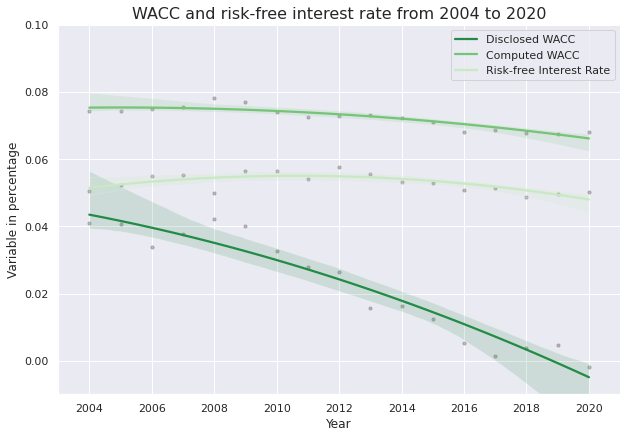

In [74]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set up figure layout
plt.figure(figsize = (10, 6))
sns.set_style("darkgrid")
sns.set_palette("Greens_r", n_colors = 3)
sns.set_context("notebook")

# Plot figure
fig = sns.lmplot(data = wacc_lm_year_melt, x="Year", y = "Percentage", hue = "variable", order = 2, height = 6, aspect = 1.5, 
                 legend = False, scatter_kws= {"s": 10, "alpha": 0.5, "color": "grey"})

# Add annotations and figure fine-tuning
plt.title("WACC and risk-free interest rate from 2004 to 2020", size = 16)
plt.xlabel("Year", size = 12)
plt.ylabel("Variable in percentage", size = 12)
plt.xlim(2003, 2021)
plt.ylim(-0.01, 0.1)
plt.legend(["Disclosed WACC", "Computed WACC", "Risk-free Interest Rate"]);

### 2.2)  Evaluation of the capital structure

In [75]:
# View the first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


In [76]:
# Subset dataframe
wacc_capstr = wacc[["Year", "Equity_ratio_market", "Debt_ratio_market"]]

# Group by "Year"-column
wacc_capstr = wacc_capstr.groupby("Year").mean()

# View first rows
wacc_capstr.head()


,Equity_ratio_market,Debt_ratio_market
Year,,
2004,0.357507,0.642493
2005,0.387515,0.612485
2006,0.414897,0.585103
2007,0.436818,0.563182
2008,0.303501,0.696499


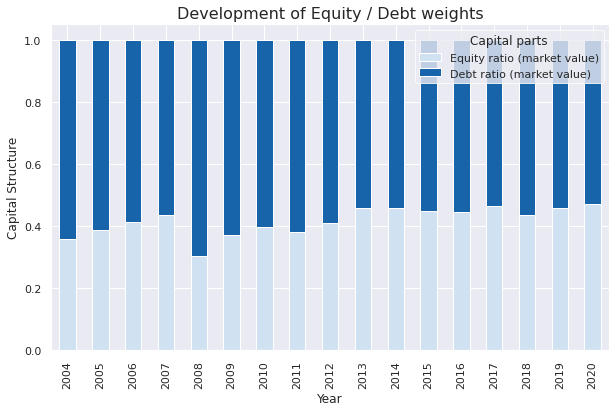

In [77]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Setup figure layout
sns.set(rc={'figure.figsize':(10, 6)})
sns.set_style("darkgrid")
sns.set_context("notebook")

# Plot figure
fig = wacc_capstr.plot.bar(stacked = True, colormap = ListedColormap(sns.color_palette("Blues", 4)))

# Add annotations
plt.legend(["Equity ratio (market value)", "Debt ratio (market value)"], facecolor = "inherit", edgecolor = "white",
           title = "Capital parts", loc = "upper right")
plt.title("Development of Equity / Debt weights", size = 16)
plt.xlabel("Year", size = 12)
plt.ylabel("Capital Structure", size = 12);


### 2.3) WACC distribution for each sector

In [78]:
# View first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


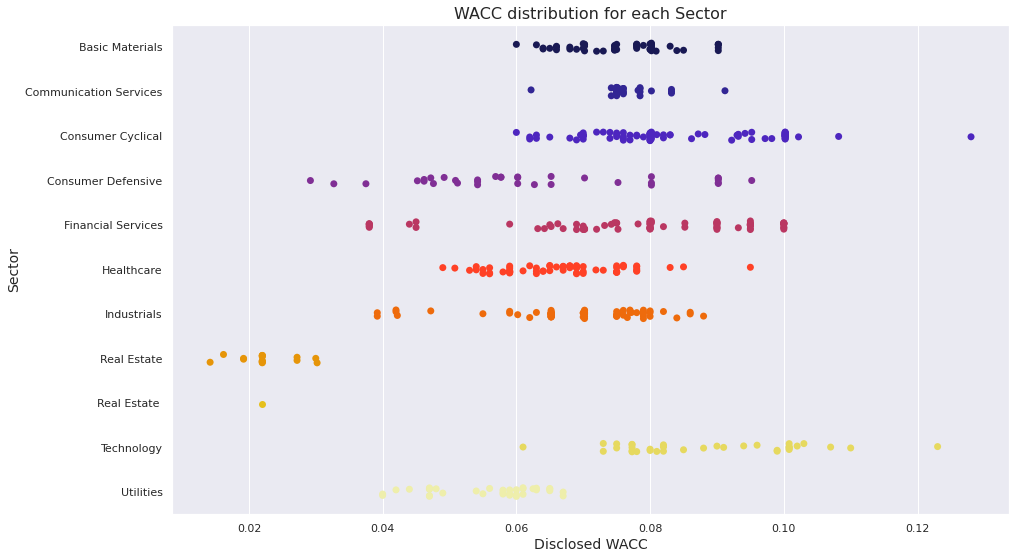

In [79]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Setup figure layout
plt.figure(figsize = (15, 9))
sns.set_context("notebook")
sns.set_palette("CMRmap_r")

# Plot figure
swarm = sns.stripplot(data = wacc, y = "Sector", x = "WACC_FS_aT", palette="CMRmap", size = 7, dodge = True)

# Add annotations
plt.title("WACC distribution for each Sector", size = 16)
plt.xlabel("Disclosed WACC", size = 14)
plt.ylabel("Sector", size = 14);

### 2.4) WACC distribution with test statistics

To get more insights to the technical things, we plot boxplots of the disclosed WACC for each sector.

A **Boxplot** shows the spread of all the data points, and also fetches other intrinsic information like the median or where most of the data cluster are, thus reflecting average trend. Basically, it is a simple way of representing statistical data on a plot in which a rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside it, to indicate the median value. The lower and upper quartiles are shown as horizontal lines on either side of this rectangle.


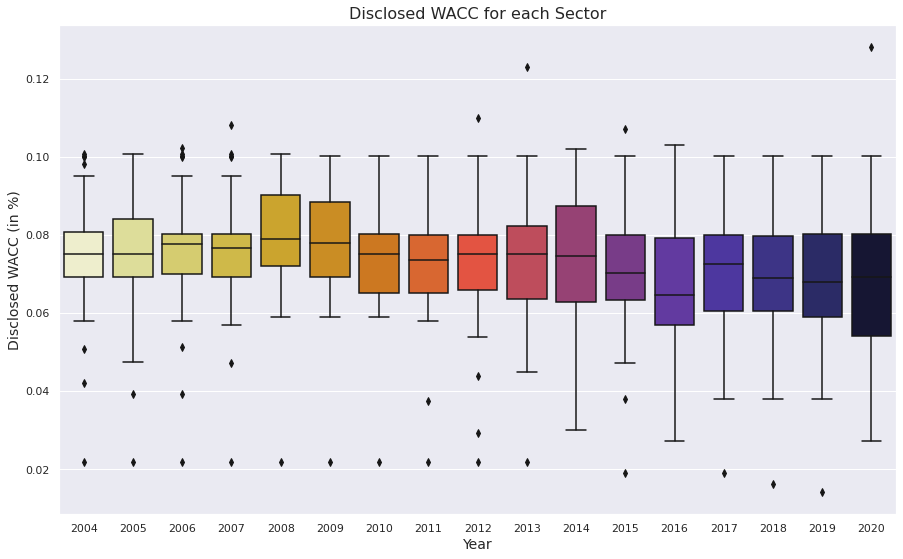

In [80]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Setup figure layout
plt.figure(figsize = (15, 9))
sns.set_style("darkgrid")
sns.set_palette("CMRmap_r", n_colors = 17)
sns.set_context("notebook")

fig = sns.boxplot(x = "Year", y = "WACC_FS_aT", data = wacc, width = 0.8)
plt.title("Disclosed WACC for each Sector", size = 16)
plt.xlabel("Year", size = 14)
plt.ylabel("Disclosed WACC (in %)", size = 14);

### 2.5) WACC distribution with test statistics

In [81]:
# View first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


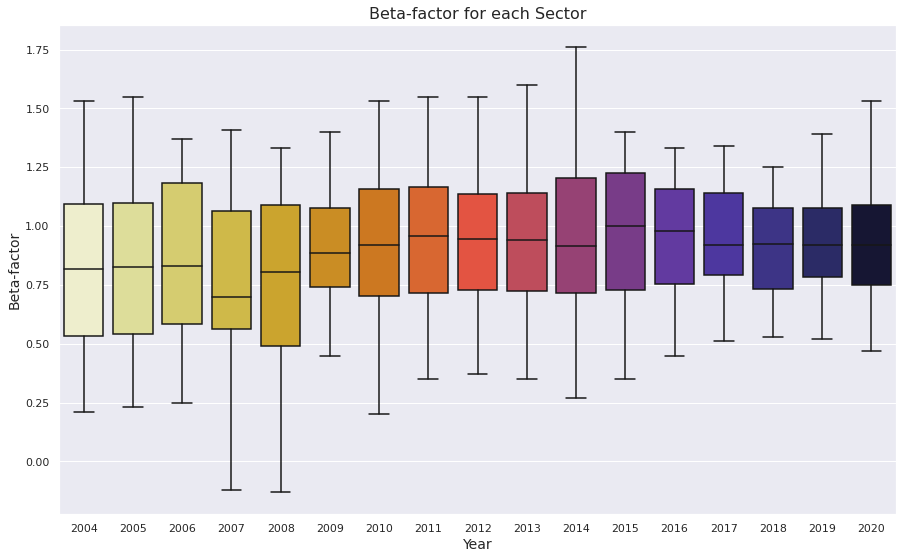

In [82]:
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Setup figure layout
plt.figure(figsize = (15, 9))
sns.set_style("darkgrid")
sns.set_palette("CMRmap_r", n_colors = 17)
sns.set_context("notebook")

fig = sns.boxplot(x = "Year", y = "Beta", data = wacc, width = 0.8)
plt.title("Beta-factor for each Sector", size = 16)
plt.xlabel("Year", size = 14)
plt.ylabel("Beta-factor", size = 14);

### 2.6) WACC related to Investment Ratio

In [83]:
# View the first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


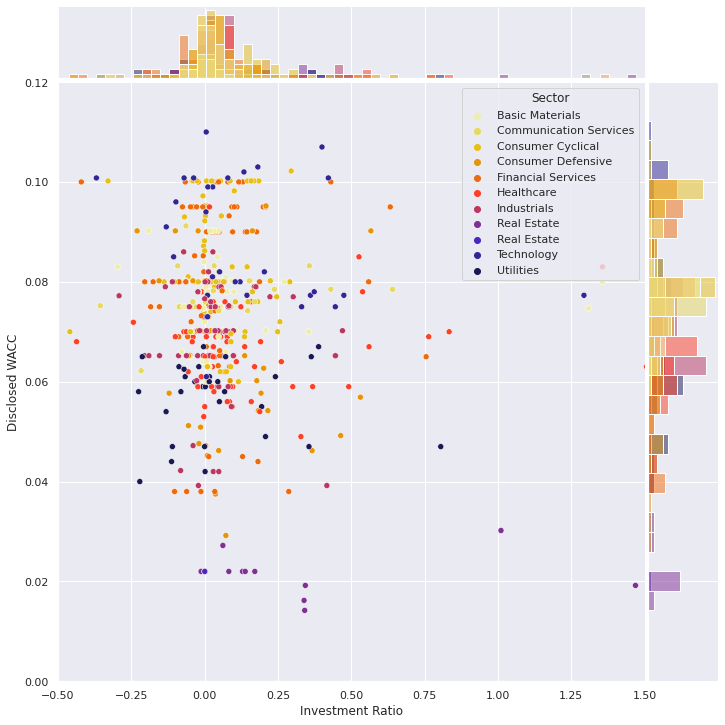

In [84]:
# Setup the grid
g = sns.JointGrid(ylim = (0, 0.12), xlim = (-0.5, 1.5),
                  height = 10, ratio = 8, space = 0.05)

sns.set_palette("CMRmap_r", n_colors=10)

# Draw Jointplot
gs = sns.scatterplot(data = wacc, x = "Investment_ratio", y = "WACC_FS_aT", hue = "Sector", 
                     palette = "CMRmap_r", ax = g.ax_joint)
gs.set(xlabel = "Investment Ratio", ylabel = "Disclosed WACC")

# Draw Histplot
gh = sns.histplot(data = wacc, y = "WACC_FS_aT", ax = g.ax_marg_y, legend = False, hue = "Sector", palette = "CMRmap_r")

gh = sns.histplot(data = wacc, x = "Investment_ratio", ax = g.ax_marg_x, legend = False, hue = "Sector", palette = "CMRmap_r")

### 2.7) Correlation-Heatmap between features

Some interesting resources:
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [Clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html)
- https://medium.com/@kbrook10/day-4-data-visualization-how-to-use-seaborn-for-heatmaps-bf8070e3846e
- https://towardsdatascience.com/understanding-the-concept-of-hierarchical-clustering-technique-c6e8243758ec

The **`.clustermap()`** method uses a hierarchical clusters to order data by similarity. This reorganizes the data for the rows and columns and displays similar content next to one another for even more depth of understanding the data.

In [85]:
# View first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


In [86]:
# Subset dataframe
wacc_heat = wacc[["WACC_cMR", "WACC_10yMR", "WACC_FS_aT", "Beta", "Risk_free_interest", "Investment_ratio"]]

# View new dataframe 
wacc_heat.head()

,WACC_cMR,WACC_10yMR,WACC_FS_aT,Beta,Risk_free_interest,Investment_ratio
0,0.0513,0.0443,0.070,0.50,0.0410,0.000887
1,0.0530,0.0475,0.081,0.51,0.0407,-0.056687
2,0.0618,0.0584,0.075,0.58,0.0338,2.744601
3,0.0435,0.0432,0.075,0.03,0.0378,-0.065697
4,0.0617,0.0537,0.083,0.49,0.0423,0.093666


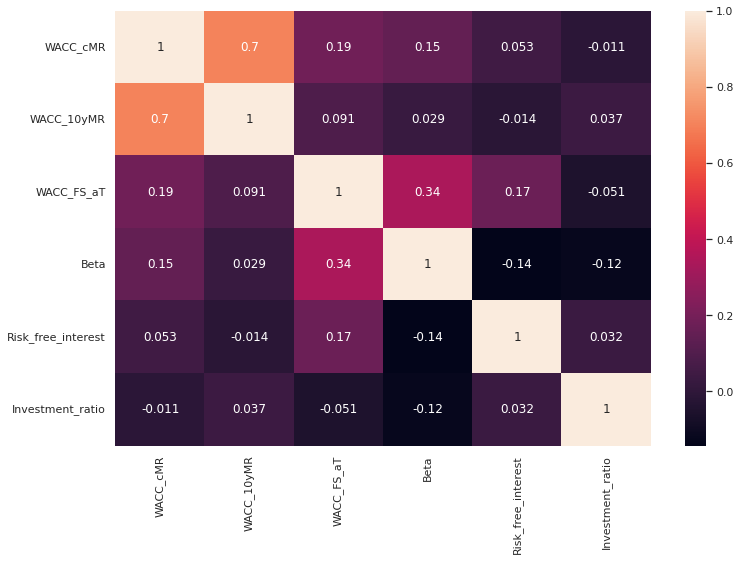

In [87]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation
wacc_corr = wacc_heat.corr(method = "pearson")

# Setup figure layout
sns.set_style("darkgrid")
sns.set_palette("Greens_r")
plt.figure(figsize=(12,8))

# Plot heatmap
sns.heatmap(wacc_corr, annot = True)

**Clustermap**

Hierarchical clustering allows visualization of clusters using dendrograms that can help in better interpretation of results through meaningful taxonomies. Creating a dendrogram doesn’t require us to specify the number of clusters upfront.

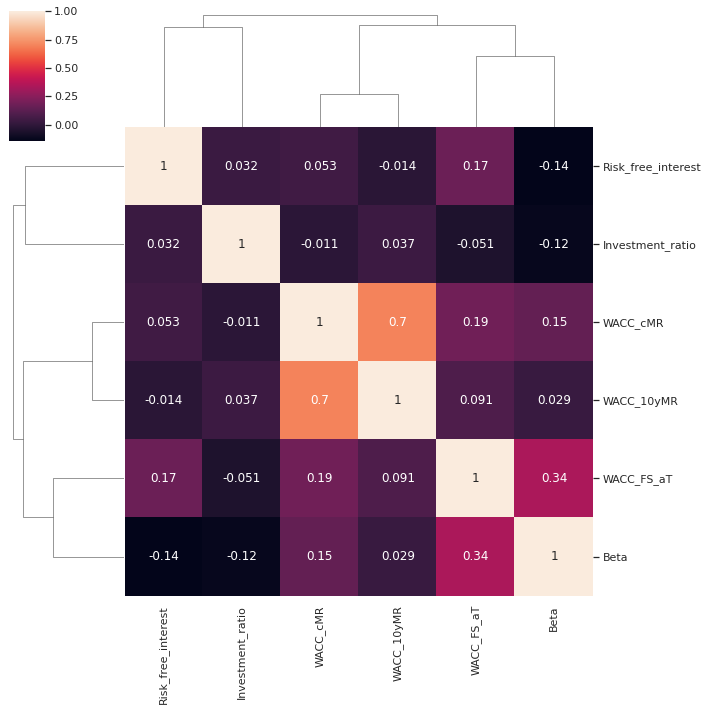

In [88]:
# Creat a clustermap
dax_cluster = sns.clustermap(wacc_corr, annot = True)

The clustermap shows that WACC_calc_10YMRP and WACC_calc_constMRP have been clustered together. Since they are clustered first in the dendogram, their distance to each other is the smallest, based on a 4-dimensional vector. To produce the dendograms seaborn uses hierarchical agglomorative clustering (HAC).

### 2.8) Relationship between WACC parameters

This part aims to assess the colinearity of various WACC parameter. Using histograms and linear regression plots gives technical insights to the linear or inverse relationship between WACC parameter.

In [89]:
# View first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


In [91]:
# Subset dataframe
wacc_params = wacc[["WACC_FS_aT", "WACC_cMR", "WACC_15yMR", "WACC_10yMR", "Beta", "Risk_free_interest", 
                            "Equity_ratio_market", "Debt_ratio_market"]]


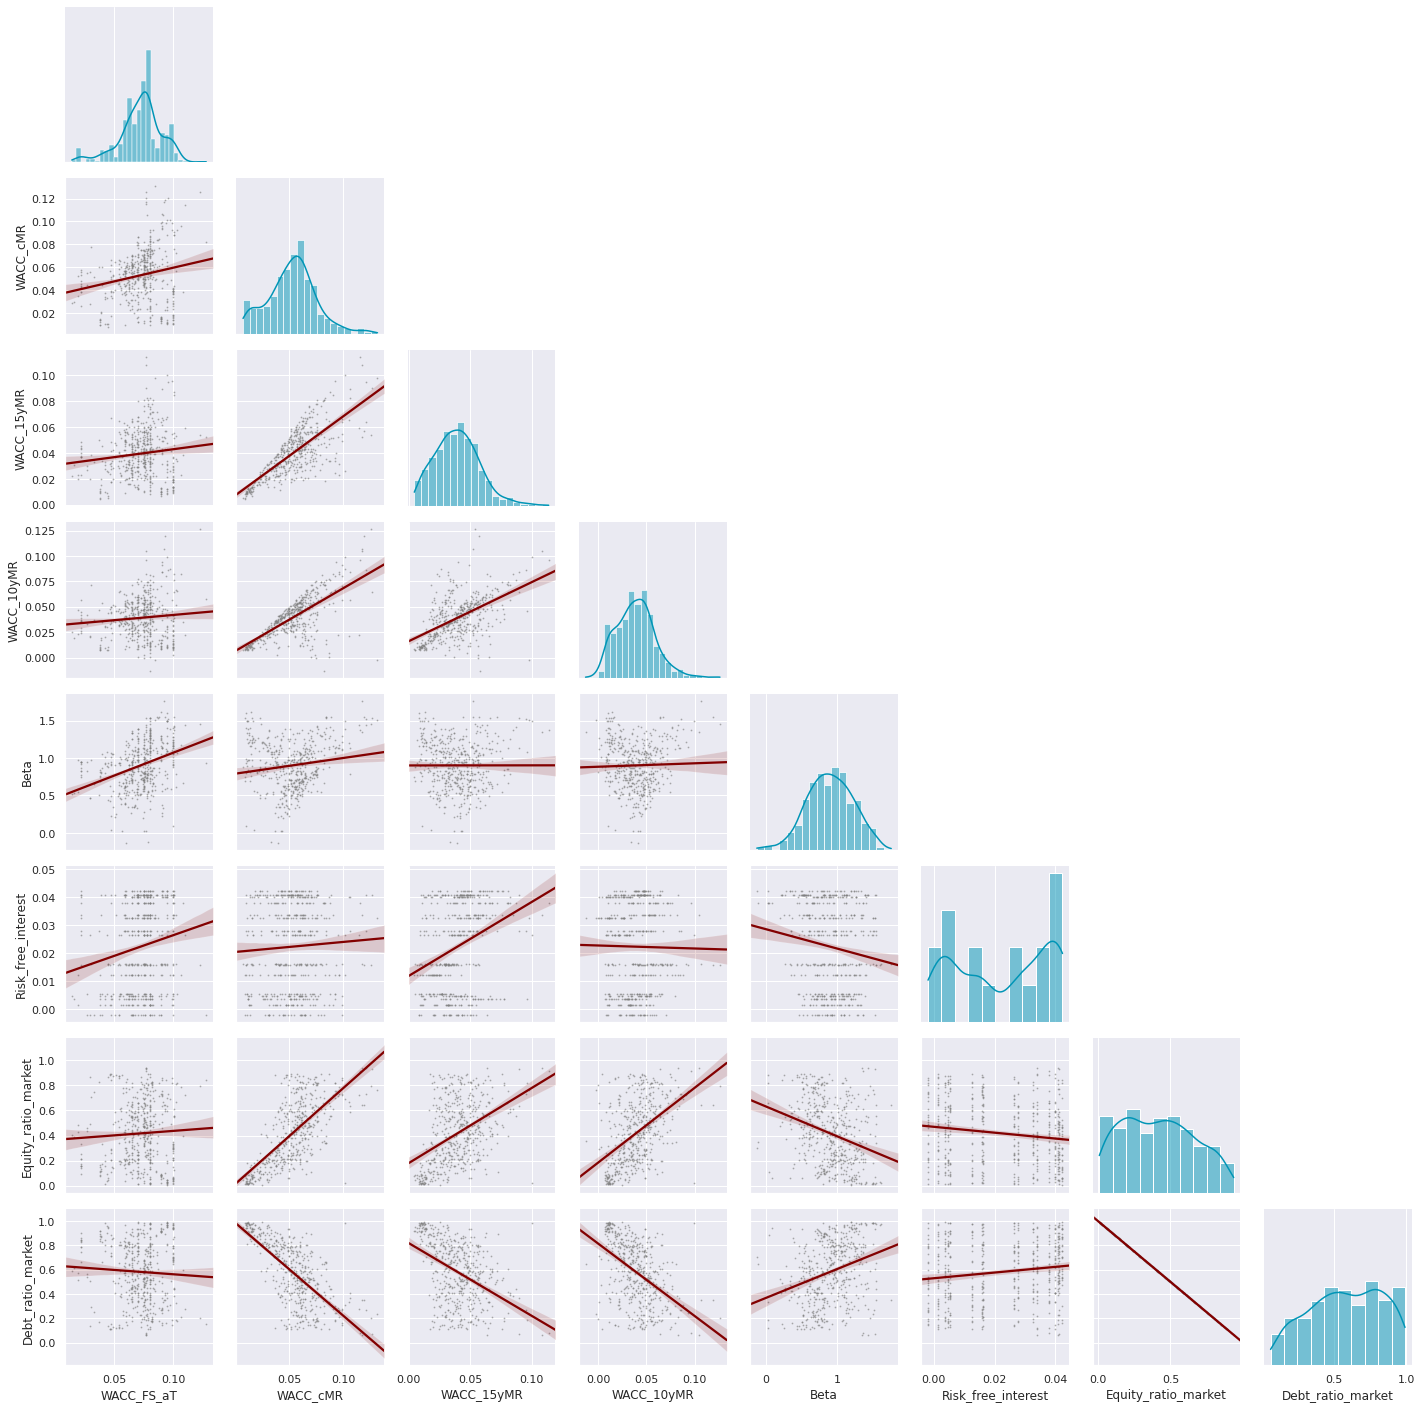

In [92]:
import seaborn as sns

pair1 = sns.PairGrid(wacc_params, corner = True)

'''
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

pair.map_upper(reg_coef)
'''
pair1.map_diag(sns.histplot, kde = True, color = "#0095B6")
pair1.map_lower(sns.regplot, color = "grey",truncate = False, scatter_kws= {"s": 0.75, "alpha": 0.5}, line_kws = {"color": "#820000"});

### 2.9) Relationship between WACC and Market-indicators
This part aims to assess the colinearity of the disclosed WACC and market indicators. Using histograms and linear regression plots gives technical insights to the linear or inverse relationship.

In [93]:
# View first rows
wacc.head()

,Company,Sector,Industry,Year,WACC_cMR,WACC_15yMR,WACC_10yMR,WACC_FS_aT,WACC_FS_bT,CAPM_cMR,CAPM_15yMR,CAPM_10yMR,Beta,Risk_free_interest,Balance_sum,Equity_book,Debt_book,Equity_ratio_book,Debt_ratio_book,Total_assets_market,Market_cap,Debt_costs_interestbearing,Equity_ratio_market,Debt_ratio_market,Debt_costs_total,Interest_expense,Debt_interestbearing,Tax_rate,Market_return_average,Market_return_annual,Market_return_10year_rolling,Investment_ratio,Revenue
0,Adidas AG,Consumer Cyclical,Footwear & Accessories,2004,0.0513,0.0472,0.0443,0.070,0.0898,0.0711,0.0585,0.04950,0.50,0.0410,4427.0,1628.0,2799.0,0.367743,0.632257,4154.0,1355.0,0.067074,0.326248,0.673752,0.025473,71.3,1063.0,0.378,0.08,0.073,0.073,0.000887,5860.0
1,Adidas AG,Consumer Cyclical,Footwear & Accessories,2005,0.0530,0.0448,0.0475,0.081,0.1008,0.0716,0.0500,0.05717,0.51,0.0407,5722.0,2684.0,3038.0,0.469067,0.530933,4908.0,1870.0,0.062606,0.380960,0.619040,0.024358,74.0,1182.0,0.337,0.08,0.271,0.091,-0.056687,6636.0
2,Adidas AG,Consumer Cyclical,Footwear & Accessories,2006,0.0618,0.0594,0.0584,0.075,0.0948,0.0729,0.0687,0.06698,0.58,0.0338,8372.0,2828.0,5544.0,0.337793,0.662207,13218.0,7674.0,0.067847,0.580569,0.419431,0.033189,184.0,2712.0,0.314,0.08,0.220,0.086,2.744601,10084.0
3,Adidas AG,Consumer Cyclical,Footwear & Accessories,2007,0.0435,0.0435,0.0432,0.075,0.0948,0.0397,0.0397,0.03925,0.03,0.0378,8314.0,3023.0,5291.0,0.363604,0.636396,15727.0,10436.0,0.074890,0.663573,0.336427,0.032130,170.0,2270.0,0.318,0.08,0.223,0.066,-0.065697,10299.0
4,Adidas AG,Consumer Cyclical,Footwear & Accessories,2008,0.0617,0.0651,0.0537,0.083,0.1028,0.0712,0.0784,0.05391,0.49,0.0423,9519.0,3386.0,6133.0,0.355710,0.644290,11495.0,5362.0,0.075046,0.466453,0.533547,0.033100,203.0,2705.0,0.288,0.08,-0.404,-0.004,0.093666,10799.0


In [94]:
# Subset dataframe
wacc_mkt = wacc[["WACC_FS_aT", "WACC_cMR", "WACC_15yMR", "WACC_10yMR", "Market_cap", "Investment_ratio", "Revenue"]]

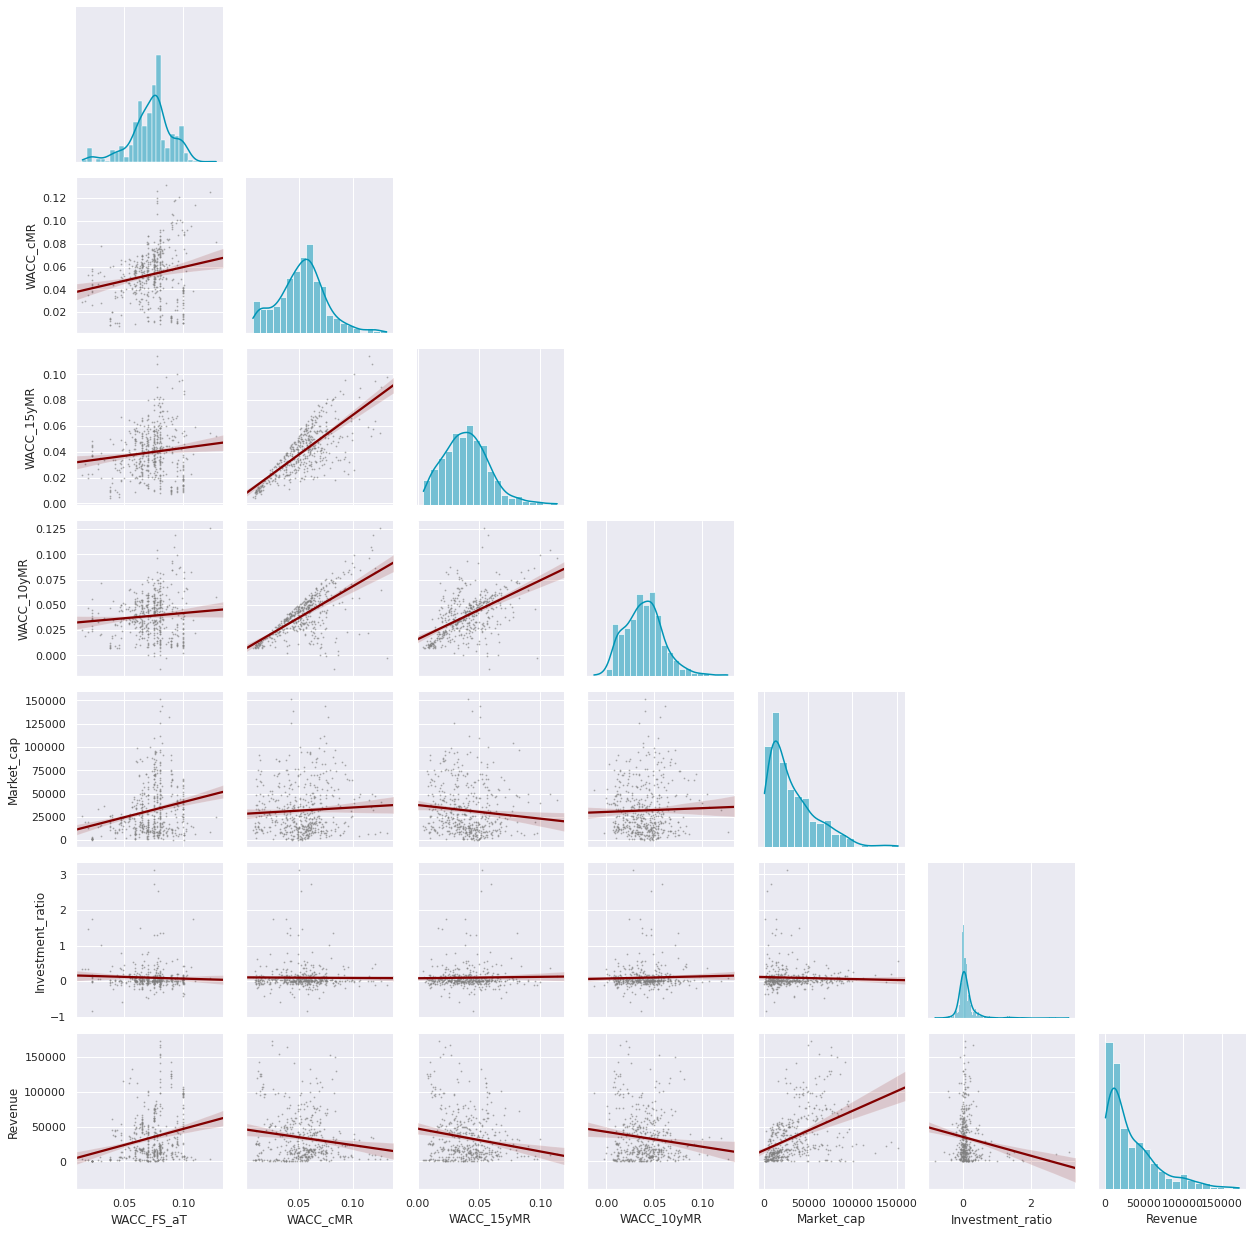

In [95]:
import seaborn as sns

pair2 = sns.PairGrid(wacc_mkt, corner = True)

pair2.map_diag(sns.histplot, kde = True, color = "#0095B6")
pair2.map_lower(sns.regplot, color = "grey", truncate = False, scatter_kws = {"s": 0.75, "alpha": 0.5}, line_kws = {"color": "#820000"})

